In [ ]:
# importing the necessary libraries
import fbprophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_E1GspfA.csv')
df.head()


,date,hour,demand
0,18-08-2018,9,91
1,18-08-2018,10,21
2,18-08-2018,13,23
3,18-08-2018,14,104
4,18-08-2018,15,81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [ ]:
df.shape

(18247, 3)

# The datset contains date and time for which the demand is forecasted. It's a simple univariate problem.
# There are 18247 entries

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date_time'] = df['date'] + pd.to_timedelta(df['hour'], unit = 'h')
df['date_time'] = df['date_time'].dt.strftime('%d-%m-%Y %H:%M')

In [ ]:
df

,date,hour,demand,date_time
0,2018-08-18,9,91,18-08-2018 09:00
1,2018-08-18,10,21,18-08-2018 10:00
2,2018-08-18,13,23,18-08-2018 13:00
3,2018-08-18,14,104,18-08-2018 14:00
4,2018-08-18,15,81,18-08-2018 15:00
...,...,...,...,...
18242,2021-02-28,19,95,28-02-2021 19:00
18243,2021-02-28,20,88,28-02-2021 20:00
18244,2021-02-28,21,39,28-02-2021 21:00
18245,2021-02-28,22,104,28-02-2021 22:00


In [ ]:
df = df.drop(['date', 'hour'], axis=1)

In [ ]:
neworder = ['date_time','demand']
df=df.reindex(columns=neworder)


In [ ]:
df

,date_time,demand
0,18-08-2018 09:00,91
1,18-08-2018 10:00,21
2,18-08-2018 13:00,23
3,18-08-2018 14:00,104
4,18-08-2018 15:00,81
...,...,...
18242,28-02-2021 19:00,95
18243,28-02-2021 20:00,88
18244,28-02-2021 21:00,39
18245,28-02-2021 22:00,104


# Hurray! finally we have manipulated the dataset into the desired format
# Now we can start with our EDA

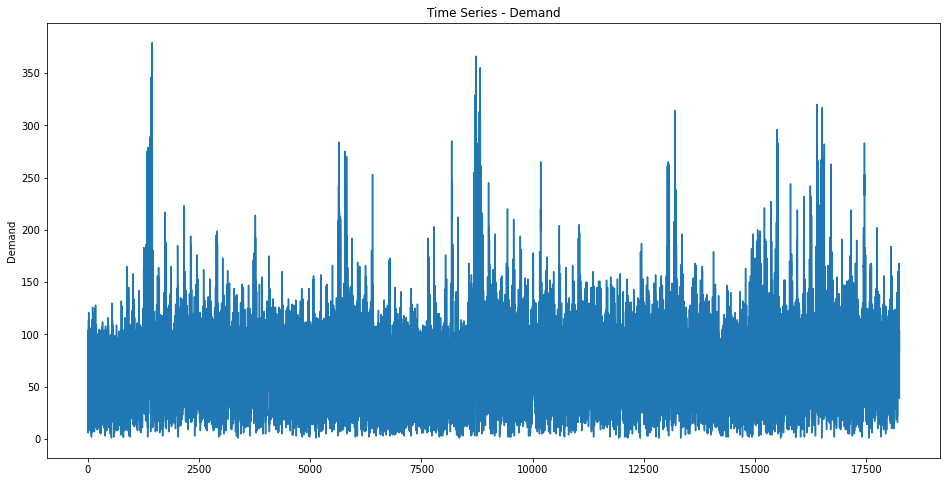

In [ ]:
# plotting the demand vs time
df['demand'].plot(kind='line', figsize=(16,8))
plt.title('Time Series - Demand')
plt.ylabel('Demand')
plt.show()

# It's very difficult to make any inferences from this plot, therefore we need to group the data and check for patterns.

The above plot doesn't convey much info, therefore we need to aggregate the data into
1. Day of week
2. Monthly data
3. Yearly data
4. Hourly data

In [ ]:
df.date_time = pd.to_datetime(df.date_time)

In [ ]:
df

,date_time,demand
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81
...,...,...
18242,2021-02-28 19:00:00,95
18243,2021-02-28 20:00:00,88
18244,2021-02-28 21:00:00,39
18245,2021-02-28 22:00:00,104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  18247 non-null  datetime64[ns]
 1   demand     18247 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.2 KB


In [ ]:
# Let's not manipulate the original data as this only for our exploration
df_copy = df.copy()
for df_copy in [df_copy] :
    df_copy['Year'] = df_copy.date_time.dt.year
    df_copy['Month'] = df_copy.date_time.dt.month
    df_copy['Day'] = df_copy.date_time.dt.day
    df_copy['Hour'] = df_copy.date_time.dt.hour

In [ ]:
def weekend_finder(row):
    if row.dayofweek == 5 or row.dayofweek == 6 :
        return 1
    else :
        return 0
for df_copy in [df_copy]:
  df_copy['Weekend'] = df.date_time.apply(weekend_finder)

In [ ]:
for df_copy in [df_copy]:
  df_copy['DayofWeek'] = df_copy.date_time.dt.dayofweek

In [ ]:
df_copy

,date_time,demand,Year,Month,Day,Hour,Weekend,DayofWeek
0,2018-08-18 09:00:00,91,2018,8,18,9,1,5
1,2018-08-18 10:00:00,21,2018,8,18,10,1,5
2,2018-08-18 13:00:00,23,2018,8,18,13,1,5
3,2018-08-18 14:00:00,104,2018,8,18,14,1,5
4,2018-08-18 15:00:00,81,2018,8,18,15,1,5
...,...,...,...,...,...,...,...,...
18242,2021-02-28 19:00:00,95,2021,2,28,19,1,6
18243,2021-02-28 20:00:00,88,2021,2,28,20,1,6
18244,2021-02-28 21:00:00,39,2021,2,28,21,1,6
18245,2021-02-28 22:00:00,104,2021,2,28,22,1,6


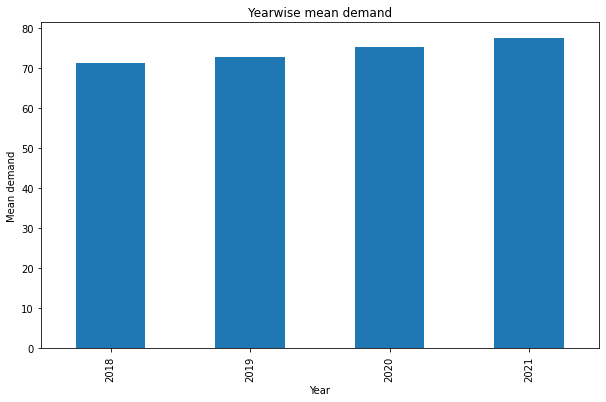

In [ ]:
df_copy.groupby('Year')['demand'].mean().plot(kind='bar',figsize=(10,6))
plt.title('Yearwise mean demand')
plt.ylabel('Mean demand')
plt.show()

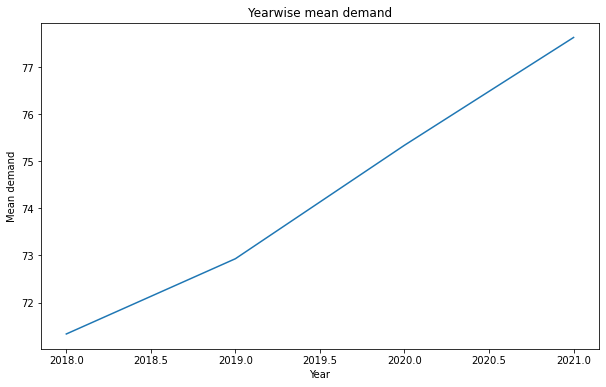

In [ ]:
df_copy.groupby('Year')['demand'].mean().plot(kind='line',figsize=(10,6))
plt.title('Yearwise mean demand')
plt.ylabel('Mean demand')
plt.show()

# From the above two graphs, we can clearly see that there is slight increase in demand over the years.

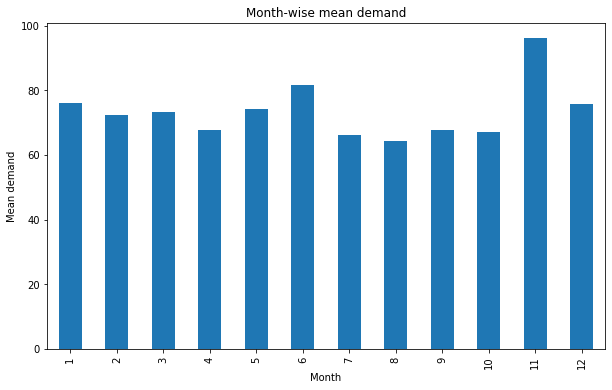

In [ ]:
df_copy.groupby('Month')['demand'].mean().plot(kind='bar',figsize=(10,6))
plt.title('Month-wise mean demand')
plt.ylabel('Mean demand')
plt.show()

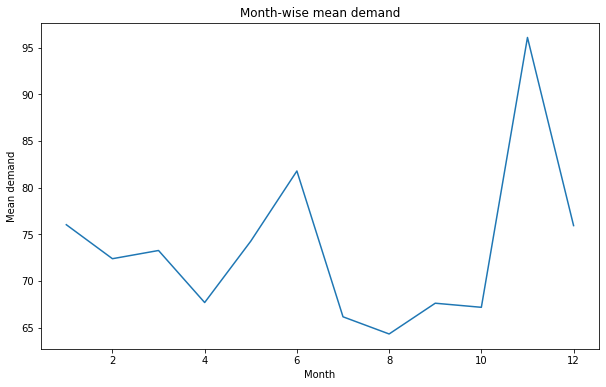

In [ ]:
df_copy.groupby('Month')['demand'].mean().plot(kind='line',figsize=(10,6))
plt.title('Month-wise mean demand')
plt.ylabel('Mean demand')
plt.show()

# The peak in November maybe during Deepavali holidays.
# The demand is high during dec-jan, this can be attributed to Christmas-New Year times.
# The higher demand in May can be attributed to summer vacations, where families rent out cars for trips.
# The peak in June is quite surprising, there needs to be further exploration here to find the exact reason.


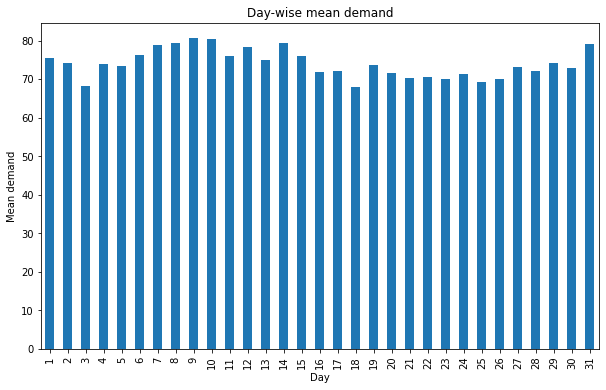

In [ ]:
df_copy.groupby('Day')['demand'].mean().plot(kind='bar',figsize=(10,6))
plt.title('Day-wise mean demand')
plt.ylabel('Mean demand')
plt.show()

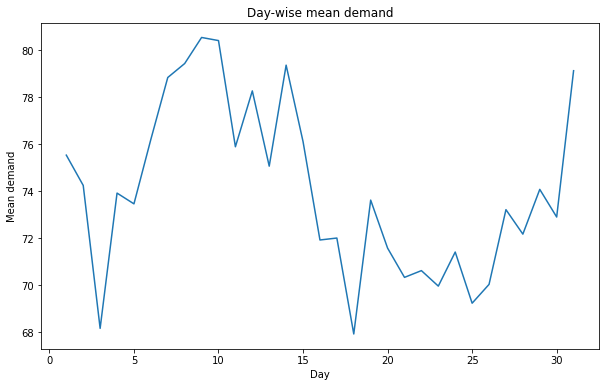

In [ ]:
df_copy.groupby('Day')['demand'].mean().plot(kind='line',figsize=(10,6))
plt.title('Day-wise mean demand')
plt.ylabel('Mean demand')
plt.show()

# There is considerable demand in the first half of the month whereas lower demand in the second half of the month. This maybe attributed to the fact that as the month progresses people's purchasing power comes down as they would have spent msot of their salaries.
# The higher value in the last couple of days of the month end can aslo be attributed to salary day.


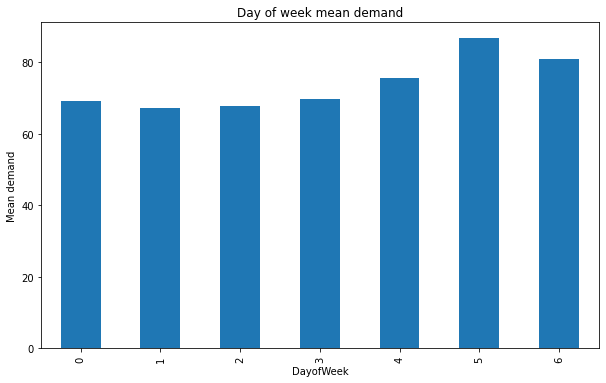

In [ ]:
df_copy.groupby('DayofWeek')['demand'].mean().plot(kind='bar',figsize=(10,6))
plt.title('Day of week mean demand')
plt.ylabel('Mean demand')
plt.show()

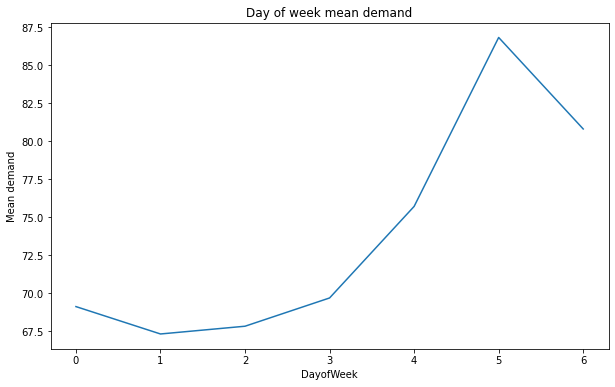

In [ ]:
df_copy.groupby('DayofWeek')['demand'].mean().plot(kind='line',figsize=(10,6))
plt.title('Day of week mean demand')
plt.ylabel('Mean demand')
plt.show()

## Wow!! There is a clear soike in demand from Friday to Sunday!! 
## This clearly tells the business operator to be prepared
## this tells the customer to expect surge pricing on weekends.

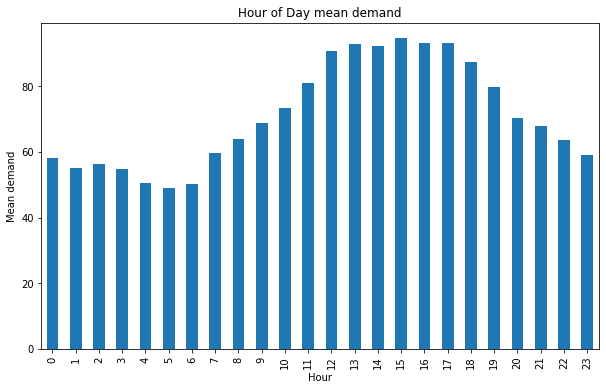

In [ ]:
df_copy.groupby('Hour')['demand'].mean().plot(kind='bar',figsize=(10,6))
plt.title('Hour of Day mean demand')
plt.ylabel('Mean demand')
plt.show()

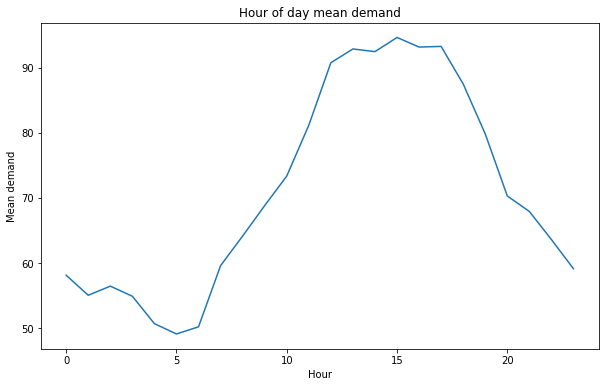

In [ ]:
df_copy.groupby('Hour')['demand'].mean().plot(kind='line',figsize=(10,6))
plt.title('Hour of day mean demand')
plt.ylabel('Mean demand')
plt.show()

# The demand tends to pickup as the day proceeds and starts to come down as the day ends.

# Model Building

In [ ]:
# Importing necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
## preparing data for fbprophet method
df['ds'] = df['date_time']
df['y'] = df['demand']


In [ ]:
df = df.drop(['date_time', 'demand'], axis=1)

In [ ]:
df

,ds,y
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81
...,...,...
18242,2021-02-28 19:00:00,95
18243,2021-02-28 20:00:00,88
18244,2021-02-28 21:00:00,39
18245,2021-02-28 22:00:00,104


In [ ]:
# training set
df_train = df.iloc[0:14598]
df_train
# validation set
df_val = df.iloc[14598:]


In [ ]:
df_train

,ds,y
0,2018-08-18 09:00:00,91
1,2018-08-18 10:00:00,21
2,2018-08-18 13:00:00,23
3,2018-08-18 14:00:00,104
4,2018-08-18 15:00:00,81
...,...,...
14593,2020-08-12 01:00:00,39
14594,2020-08-12 02:00:00,22
14595,2020-08-12 04:00:00,75
14596,2020-08-12 05:00:00,49


In [ ]:
df_val

,ds,y
14598,2020-08-12 07:00:00,52
14599,2020-08-12 08:00:00,90
14600,2020-08-12 09:00:00,34
14601,2020-08-12 10:00:00,76
14602,2020-08-12 11:00:00,46
...,...,...
18242,2021-02-28 19:00:00,95
18243,2021-02-28 20:00:00,88
18244,2021-02-28 21:00:00,39
18245,2021-02-28 22:00:00,104


In [ ]:
from fbprophet import Prophet
prophet_model = Prophet()
prophet_model.fit(df_train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# making a prediction on training dataset itself
forecast = prophet_model.predict(df_train)

In [ ]:
y_train_pred = forecast['yhat']

In [ ]:
print(forecast['yhat'])

0        49.625794
1        56.015488
2        72.550397
3        74.648495
4        75.270885
           ...    
14593    46.507473
14594    42.856335
14595    39.765538
14596    41.942976
14597    45.885153
Name: yhat, Length: 14598, dtype: float64


In [ ]:
y_train = df_train['y']

In [ ]:
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))

In [ ]:
print(train_rmse)

36.743471054254854


# Checking for validation set

> Indented block



In [ ]:
forecast_val = prophet_model.predict(df_val)

In [ ]:
y_val_pred = forecast_val['yhat']
print(y_val_pred)

0       50.502732
1       55.325692
2       60.600938
3       66.592189
4       72.876343
          ...    
3644    79.431560
3645    72.204670
3646    65.515413
3647    60.441665
3648    56.816047
Name: yhat, Length: 3649, dtype: float64


In [ ]:
y_val = df_val['y']
rmse_validation = sqrt(mean_squared_error(y_val, y_val_pred))
print(rmse_validation)

40.86427402206218


In [ ]:
# making predictions on the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_6QvDdzb.csv')
df_test.head()

,date,hour
0,01-03-2021,0
1,01-03-2021,1
2,01-03-2021,2
3,01-03-2021,3
4,01-03-2021,5


In [ ]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['date_time'] = df_test['date'] + pd.to_timedelta(df_test['hour'], unit = 'h')
df_test['date_time'] = df_test['date_time'].dt.strftime('%d-%m-%Y %H:%M')


In [ ]:
df_test

,date,hour,date_time
0,2021-01-03,0,03-01-2021 00:00
1,2021-01-03,1,03-01-2021 01:00
2,2021-01-03,2,03-01-2021 02:00
3,2021-01-03,3,03-01-2021 03:00
4,2021-01-03,5,03-01-2021 05:00
...,...,...,...
7645,2022-03-28,19,28-03-2022 19:00
7646,2022-03-28,20,28-03-2022 20:00
7647,2022-03-28,21,28-03-2022 21:00
7648,2022-03-28,22,28-03-2022 22:00


In [ ]:
df_test['ds'] = df_test['date_time']

In [ ]:
df_test = df_test.drop(['date', 'hour', 'date_time'], axis=1)

In [ ]:
df_test['ds'] = pd.to_datetime(df_test['ds'])

In [ ]:
df_test

,ds
0,2021-03-01 00:00:00
1,2021-03-01 01:00:00
2,2021-03-01 02:00:00
3,2021-03-01 03:00:00
4,2021-03-01 05:00:00
...,...
7645,2022-03-28 19:00:00
7646,2022-03-28 20:00:00
7647,2022-03-28 21:00:00
7648,2022-03-28 22:00:00


In [ ]:
forecast_test = prophet_model.predict(df_test)

In [ ]:
# The predicted output(demand)
test_data_demand = forecast_test['yhat'].round()
print(test_data_demand)

0       54.0
1       50.0
2       45.0
3       42.0
4       43.0
        ... 
7645    62.0
7646    56.0
7647    49.0
7648    45.0
7649    42.0
Name: yhat, Length: 7650, dtype: float64


In [ ]:
# convert the ds back to date and time
df_test['date'] = df_test['ds'].dt.date

In [ ]:
df_test['hour'] = pd.to_datetime(df_test['ds']).dt.hour

In [ ]:
df_test

,ds,date,hour
0,2021-03-01 00:00:00,2021-03-01,0
1,2021-03-01 01:00:00,2021-03-01,1
2,2021-03-01 02:00:00,2021-03-01,2
3,2021-03-01 03:00:00,2021-03-01,3
4,2021-03-01 05:00:00,2021-03-01,5
...,...,...,...
7645,2022-03-28 19:00:00,2022-03-28,19
7646,2022-03-28 20:00:00,2022-03-28,20
7647,2022-03-28 21:00:00,2022-03-28,21
7648,2022-03-28 22:00:00,2022-03-28,22


In [ ]:
df_test = df_test.drop(['ds'], axis=1)

In [ ]:
df_test

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [ ]:
df_test['demand'] = test_data_demand.astype(int)

In [ ]:
df_test

,date,hour,demand
0,2021-03-01,0,54
1,2021-03-01,1,50
2,2021-03-01,2,45
3,2021-03-01,3,42
4,2021-03-01,5,43
...,...,...,...
7645,2022-03-28,19,62
7646,2022-03-28,20,56
7647,2022-03-28,21,49
7648,2022-03-28,22,45


In [ ]:
df_test.set_index('date')

,hour,demand
date,,
2021-03-01,0,54
2021-03-01,1,50
2021-03-01,2,45
2021-03-01,3,42
2021-03-01,5,43
...,...,...
2022-03-28,19,62
2022-03-28,20,56
2022-03-28,21,49


In [ ]:
# final submission
df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/car_solution.csv', mode='w', index=False)